In [246]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# MNE Raw files

In [247]:
raw = mne.io.read_raw("../../data/R_S1.fif", preload=True)

Opening raw data file ../../data/R_S1.fif...
    Range : 0 ... 60870 =      0.000 ...   243.480 secs
Ready.
Reading 0 ... 60870  =      0.000 ...   243.480 secs...
<ipython-input-247-c79686ab00f8>:1: RuntimeWarning: This filename (../../data/R_S1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw("../../data/R_S1.fif", preload=True)


Effective window size : 8.192 (s)


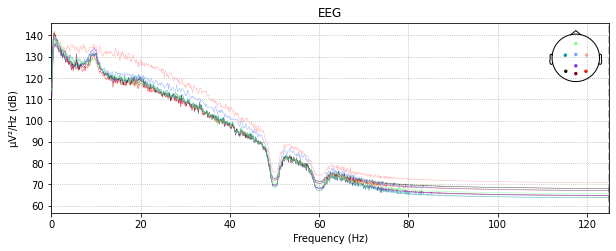

In [248]:
_=raw.plot_psd()

Effective window size : 8.192 (s)


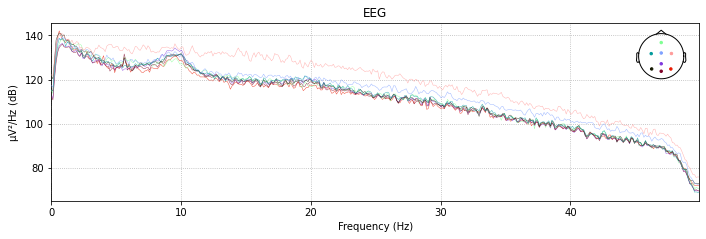

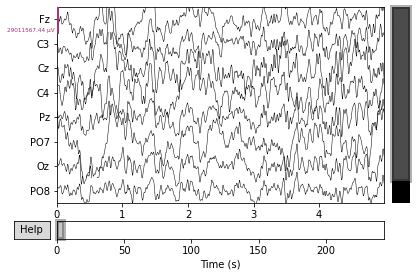

Channels marked as bad: none


In [249]:
_=raw.plot_psd(fmax=50)
_=raw.plot(duration=5, n_channels=8, scalings="auto")

## Preprocessing

In [250]:
raw = raw.filter(0.1, 100., fir_design="firwin")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)



Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
121 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


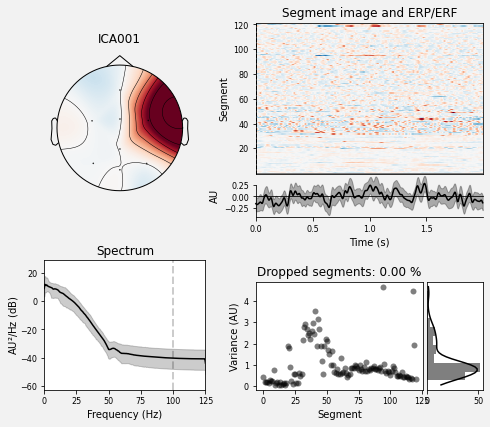

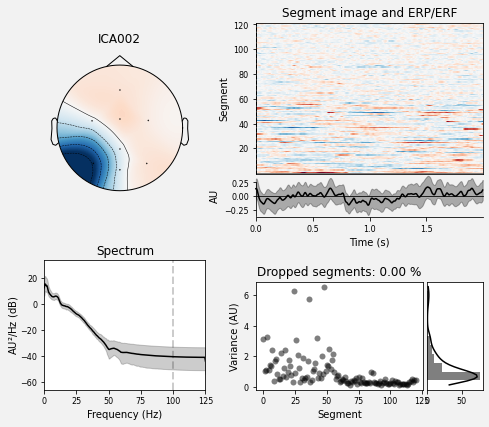

In [251]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=4, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
_=ica.plot_properties(raw, picks=ica.exclude)

In [252]:
# ica.apply(raw)

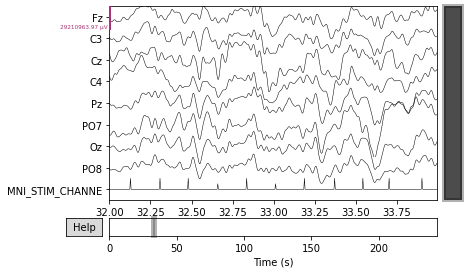

Channels marked as bad: none


In [253]:
_=raw.plot(start=32, duration=2, scalings="auto")

In [254]:
events = mne.find_events(raw)
print(events[:5])
event_dict = {'Non-target': 2, 'Target': 1}

1200 events found
Event IDs: [1 2]
[[1254    0    2]
 [1299    0    2]
 [1342    0    2]
 [1383    0    2]
 [1430    0    1]]


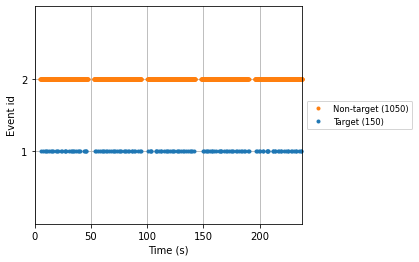

In [255]:
_=mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

In [256]:
reject_criteria = dict(eeg=200)       # 150 µV
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5, reject=reject_criteria, preload=True)

Not setting metadata
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1200 events and 176 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
    Rejecting  epoch based on EEG : ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
    Rejecting  epoch based on EEG : ['Fz', 'C3', 'Cz', 'C4', 'P

In [257]:
conds_we_care_about = ['Target', 'Non-target']
epochs.equalize_event_counts(conds_we_care_about)
target_epochs = epochs['Target']
notarget_epochs = epochs['Non-target']

Dropped 886 epochs: 0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 160, 161, 162, 163, 164, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 196, 197, 198, 199, 200, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 221, 222, 225, 226, 227, 230, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 251, 252, 253, 254, 255, 256, 257, 258, 259, 262, 263, 264, 265, 266, 267, 268, 269, 272, 273, 274, 275, 276, 277, 278, 279, 280,

Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


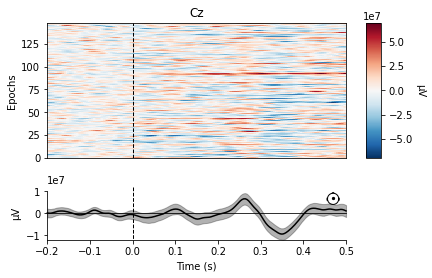

In [258]:
_=target_epochs.plot_image(picks='Cz')

Not setting metadata
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


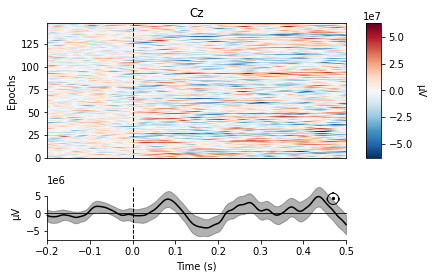

In [259]:
_=notarget_epochs.plot_image(picks='Cz')

No baseline correction applied


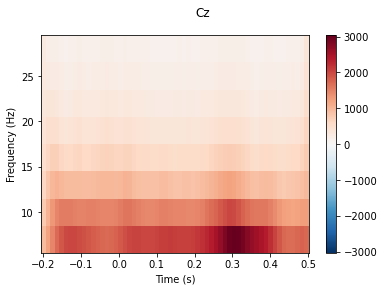

In [260]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(target_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
_=power.plot(['Cz'])

In [287]:
target_evoked = target_epochs.average()
notarget_evoked = notarget_epochs.average()

_=mne.viz.plot_compare_evokeds(dict(target=target_evoked, non_target=notarget_evoked),
                             legend='upper left', show_sensors='upper right')

_.savefig("../../fig/evoked-diff.png")

combining channels using "gfp"
combining channels using "gfp"


AttributeError: 'list' object has no attribute 'savefig'

No projector specified for this dataset. Please consider the method self.add_proj.


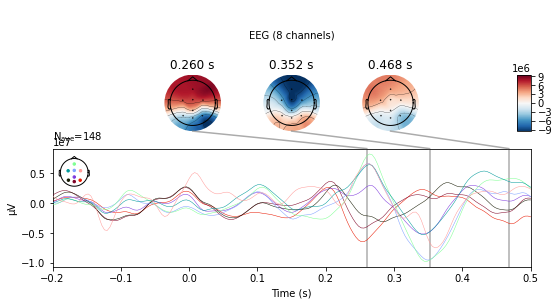

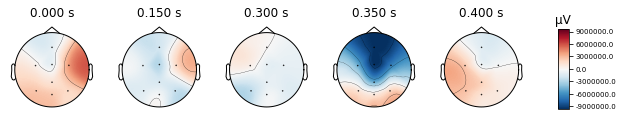

In [262]:
_=target_evoked.plot_joint(picks='eeg')
_=target_evoked.plot_topomap(times=[0., 0.15, 0.3, 0.35, 0.4], ch_type='eeg')
_.savefig("../../fig/target-evoked.png")

No projector specified for this dataset. Please consider the method self.add_proj.


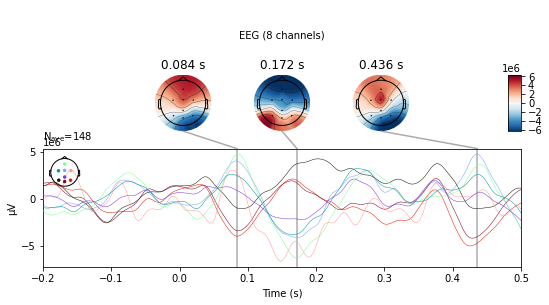

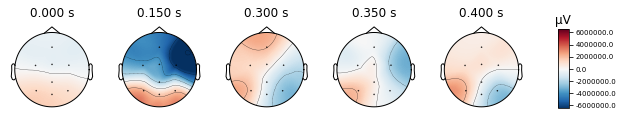

In [263]:
_=notarget_evoked.plot_joint(picks='eeg')
_=notarget_evoked.plot_topomap(times=[0., 0.15, 0.3, 0.35, 0.4], ch_type='eeg')
_.savefig("../../fig/non-target-evoked.png")

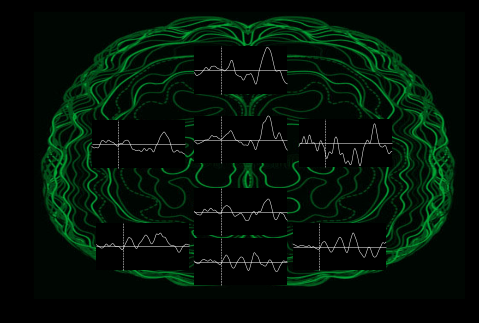

In [285]:
evoked_diff = mne.combine_evoked([notarget_evoked, target_evoked], weights=[1, -1])
from skimage import io

fig = plt.figure(figsize=(4,3))
_=evoked_diff.plot_topo(legend=False, fig_background=io.imread("../../fig/topo_bg.jpg"), background_color=[0,0,0,1], color="w")
_.savefig('../../fig/topo.png', dpi=72)
# evoked_diff.plot_topo()